# Exploratory Data Analysis

In [4]:
# import data set

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

loan_df = pd.read_csv('loan_approval_dataset.csv')

print(loan_df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

## Missing Values

In [6]:
# remove leading and trailing whitespaces from column names
loan_df.rename(columns=lambda x: x.strip(), inplace=True)


# checking for missing values
missing_values = loan_df.isnull().sum()

missing_values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data Types

In [7]:
# data types
data_types = loan_df.dtypes

data_types

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

## Exploring Categorical Vaiables

In [8]:
# counts of categorical

education_counts = loan_df['education'].value_counts()
self_employed_counts = loan_df['self_employed'].value_counts()
loan_status_counts = loan_df['loan_status'].value_counts()

print("The education counts:")
print(education_counts)
print("\nThe self employed counts:")
print(self_employed_counts)
print("\nThe loan status counts:")
print(loan_status_counts)

The education counts:
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

The self employed counts:
 Yes    2150
 No     2119
Name: self_employed, dtype: int64

The loan status counts:
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


## Exploring Numerical Variables

In [9]:
# summary statistics of numerical variables
summary_stats = loan_df.describe()

summary_stats

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Outlier Analysis with Visualizations

#### Histogram

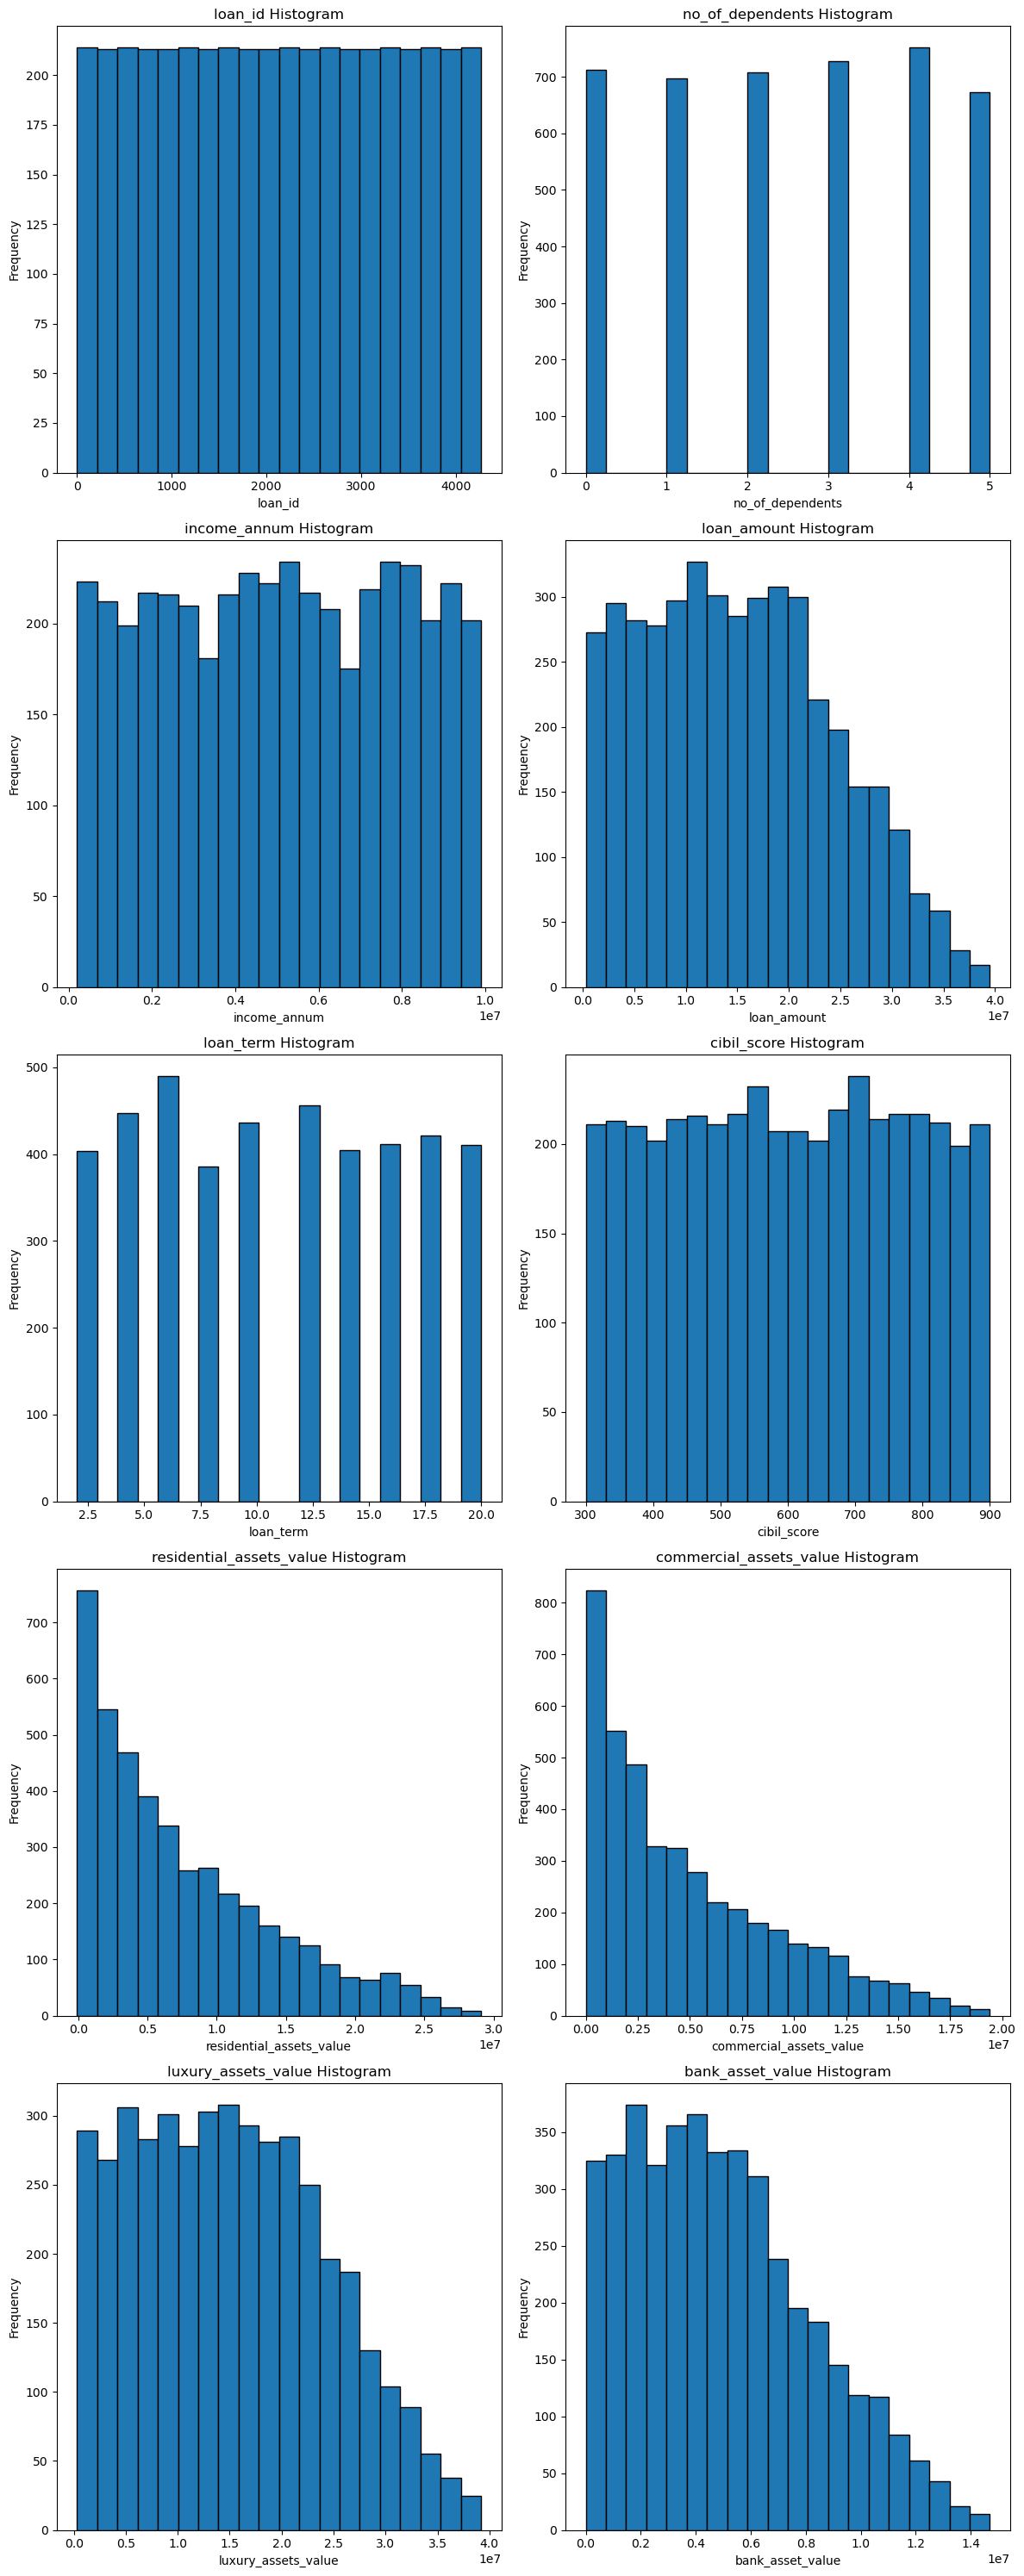

In [10]:
# histogram
numerical_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
num_numerical = len(numerical_columns)

# number of rows and columns for subplots
num_rows = (num_numerical - 1) // 2 + 1
num_cols = 2

plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.hist(loan_df[column], bins=20, edgecolor='k')
    plt.title(column + " Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Bar Charts

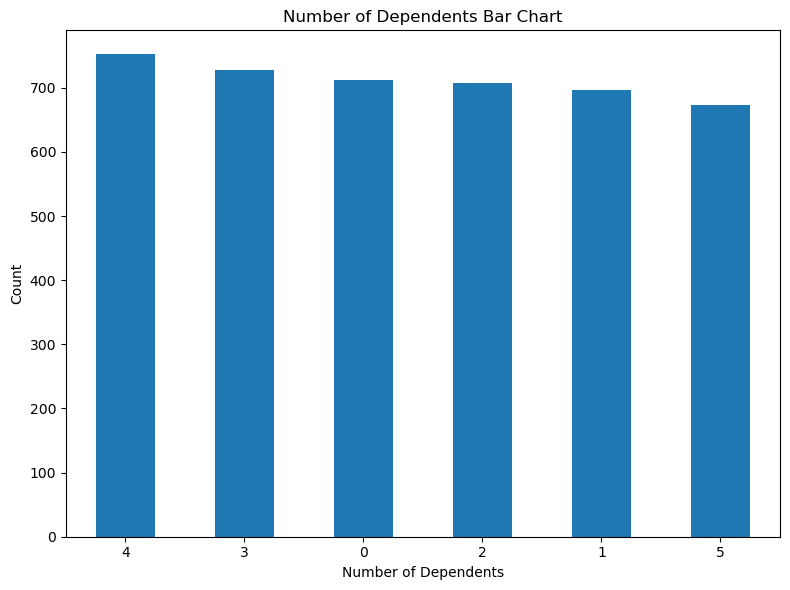

In [11]:
# bar charts for number of dependents
plt.figure(figsize=(8, 6))
loan_df['no_of_dependents'].value_counts().plot(kind='bar')
plt.title("Number of Dependents Bar Chart")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels upright

plt.tight_layout()
plt.show()

#### Box Plots

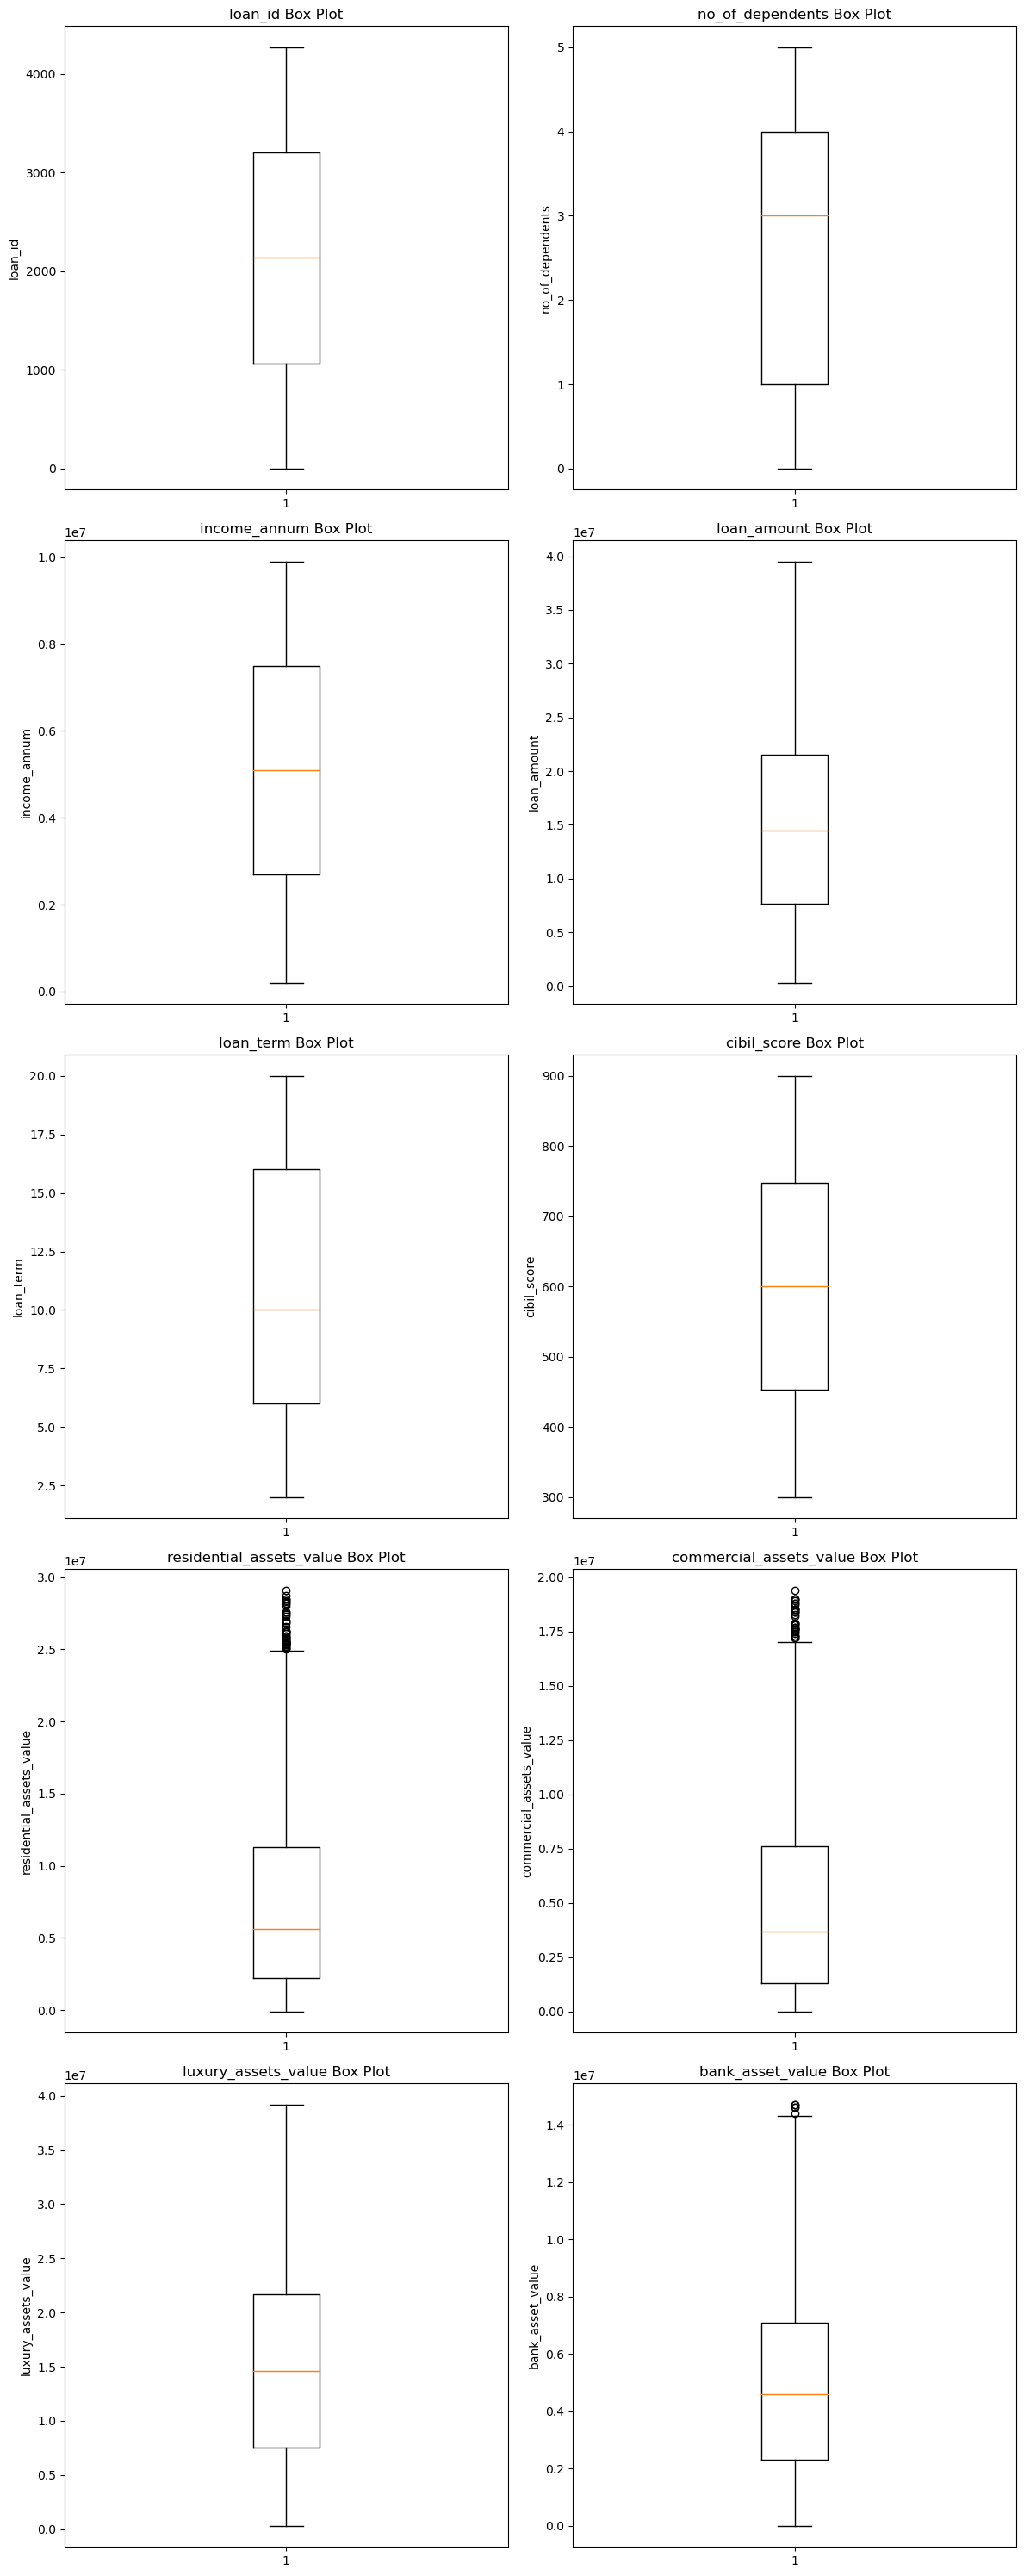

In [12]:
# box plots
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.boxplot(loan_df[column])
    plt.title(column + " Box Plot")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Correlation  

In [13]:
# correlation matrix
correlation_matrix = loan_df.corr() 
correlation_matrix

/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_51412/30964392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


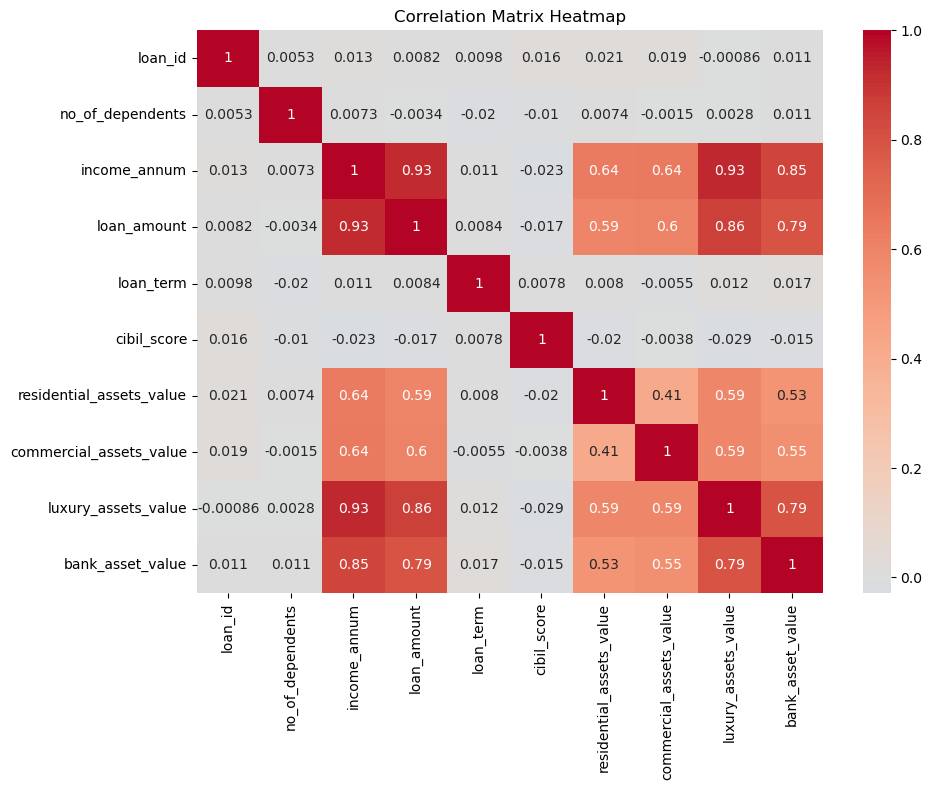

In [14]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.show()

**Insights from Correlation matrix Heatmap-**

1. Income annum and loan amount have a strong positive correlation

2. The loan amount and all 4 assets (residential, commercial, luxury, and bank) have a moderate positive correlation.


## Data Pre-processing

## Feature Transformation

In [15]:
# Combining all asset values into one variable 
loan_df['total_assets'] = loan_df['residential_assets_value'] + loan_df['commercial_assets_value'] + loan_df['luxury_assets_value'] + loan_df['bank_asset_value']

loan_df['total_assets']

0       50700000
1       17000000
2       57700000
3       52700000
4       55000000
          ...   
4264     7400000
4265    20000000
4266    39000000
4267    28800000
4268    77300000
Name: total_assets, Length: 4269, dtype: int64

### Histograms with density plot of total_assets and loan_amount

/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_51412/3581814956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=loan_df['total_assets'], bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[0])
/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_51412/3581814956.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Figure size 640x480 with 0 Axes>

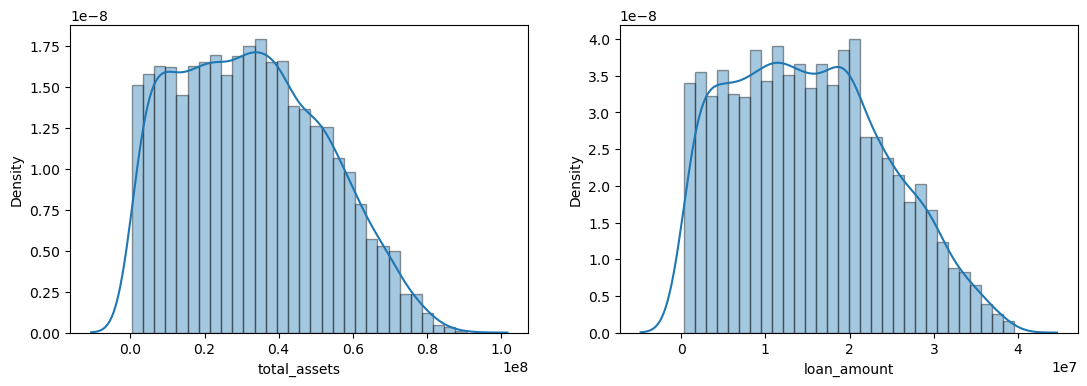

In [16]:
plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.distplot(a=loan_df['total_assets'], bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[0])
sns.distplot(a=loan_df['loan_amount'], bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[1])

plt.show()

### Log Transformation

/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_51412/3718514088.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=transformed_total_assets, bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[0])
/var/folders/p1/cyxzhs3905n4sr201fghspdc0000gn/T/ipykernel_51412/3718514088.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

<Figure size 640x480 with 0 Axes>

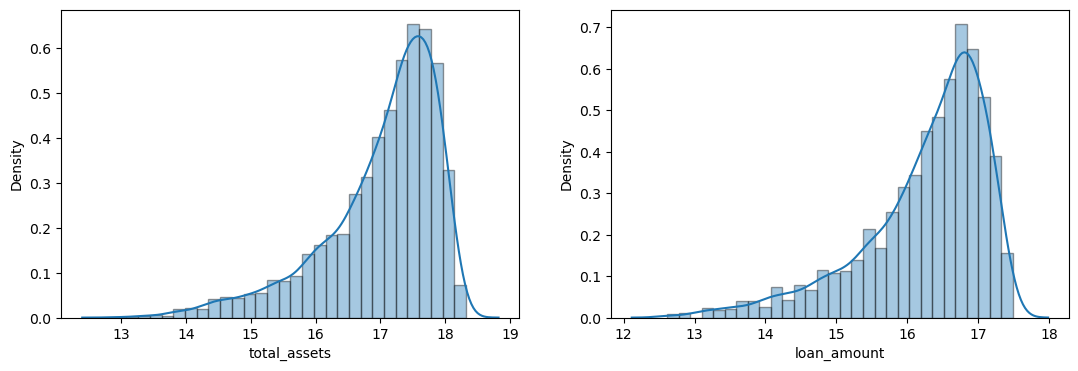

In [17]:
# log transformation
transform = FunctionTransformer(func=np.log1p)
transformed_total_assets = transform.fit_transform(loan_df['total_assets'])

transformed_loan_amount = transform.fit_transform(loan_df['loan_amount'])

plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.distplot(a=transformed_total_assets, bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[0])
sns.distplot(a=transformed_loan_amount, bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[1])

plt.show()

**The log transformation does not reduce the skewness and does not make the data perfectly fit into a normal distribution. Hence, we are choosing quantile transformation.**

### Quantile Transformation

NameError: name 'data_transformed' is not defined

<Figure size 640x480 with 0 Axes>

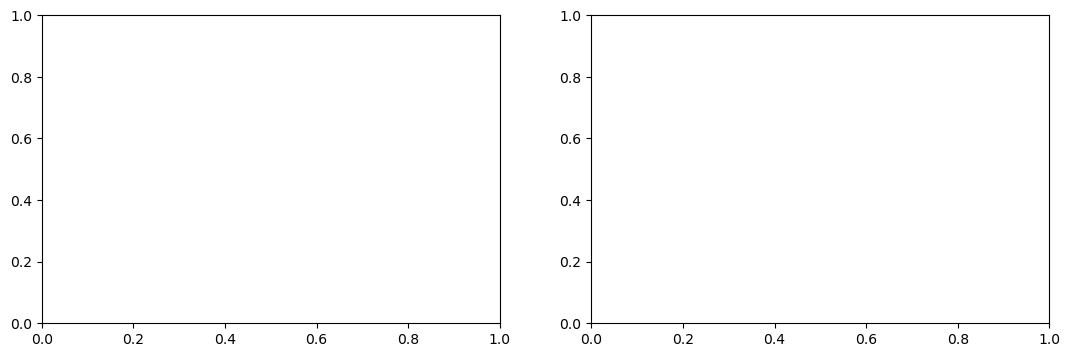

In [18]:
# Quantile Transformation
quantile = QuantileTransformer(output_distribution='normal')
loan_df['transformed_total_assets'] = quantile.fit_transform(loan_df['total_assets'].values.reshape(-1, 1))

loan_df['transformed_loan_amount'] = quantile.fit_transform(loan_df['loan_amount'].values.reshape(-1, 1))

plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.distplot(a=data_transformed, bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[0])
sns.distplot(a=transformed_loan_amount, bins=30, hist_kws={"edgecolor": 'black'}, ax=axes[1])

plt.show()

## Correlation Based Feature Selection

**From the Correlation matrix, it is observed that income_annum and loan_amount variables are the most correlated predictors.**

In [19]:
# Define Predictor A as income_annum
predictor_A = 'income_annum'

# Calculate average correlation between predictor A and other predictors
avg_corr_A = correlation_matrix[predictor_A].drop(predictor_A).mean()
avg_corr_A

0.4436877752988143

In [20]:
# Define Predictor B as loan_amount
predictor_B = 'loan_amount'

# Calculate average correlation between predictor A and other predictors
avg_corr_B = correlation_matrix[predictor_B].drop(predictor_B).mean()
avg_corr_B

0.41894403416465464

**Predictor A has a larger average correlation, hence dropping the predictor income_annum and using the predictors education, loan_amount, and total assets for our final model.**

## Data Partition

In [21]:
loan = loan_df[['education','transformed_loan_amount','transformed_total_assets','loan_status']]

loan.head()

,education,transformed_loan_amount,transformed_total_assets,loan_status
0,Graduate,1.509656,0.837338,Approved
1,Not Graduate,-0.218773,-0.639462,Rejected
2,Graduate,1.482760,1.174387,Rejected
3,Graduate,1.620592,0.933910,Rejected
4,Not Graduate,0.928105,1.048748,Rejected


In [22]:
# Split the training and test data
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

In [23]:
# Proportions of training and test data
train_prop = len(loan_train)/len(loan)
test_prop = len(loan_test)/len(loan)

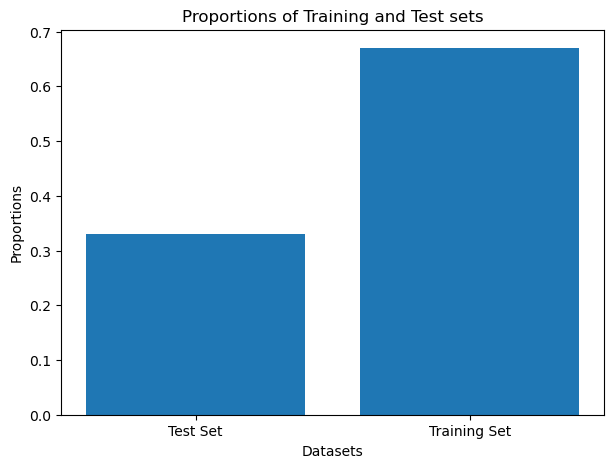

In [24]:
plt.figure(figsize=(7,5))
labels = ['Test Set', 'Training Set']
proportions = [test_prop, train_prop]
plt.bar(labels,proportions)
plt.xlabel("Datasets")
plt.ylabel("Proportions")
plt.title("Proportions of Training and Test sets")
plt.show()

In [25]:
print("No of records in the training data set:",len(loan_train))

print("\nNo of records in the test data set:",len(loan_test))

print("\nLoan status counts:")
print(loan_train['loan_status'].value_counts())

No of records in the training data set: 2860

No of records in the test data set: 1409

Loan status counts:
 Approved    1791
 Rejected    1069
Name: loan_status, dtype: int64


**To check the rebalancing in the dataset, it is observed that 67% of records have loan status Approved and 33% Rejected. Hence, no resampling is required.**

# Modeling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression Modeling

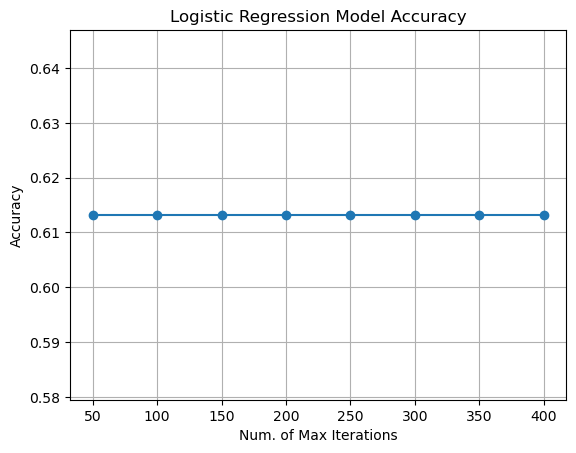

In [31]:
#utilizes prior split training and test data sets
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

#address categorical variables
loan_train = pd.get_dummies(loan_train, columns=['education'], drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

#Separate features and target vars. within training set
X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

max_iter_values = np.arange(50, 401, 50)
accuracy_scores = []

#model is trained and utilized to make predictions
for max_iter in max_iter_values:
    
    model = LogisticRegression(solver='saga', max_iter=max_iter, random_state=7)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(max_iter_values, accuracy_scores, marker='o')
plt.xlabel("Num. of Max Iterations")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Model Accuracy")
plt.grid(True)
plt.show()

## Evaluation of the Logistic Regression Model

Accuracy: 0.6132008516678495
Classification Report:
               precision    recall  f1-score   support

    Approved       0.61      1.00      0.76       865
    Rejected       0.00      0.00      0.00       544

    accuracy                           0.61      1409
   macro avg       0.31      0.50      0.38      1409
weighted avg       0.38      0.61      0.47      1409



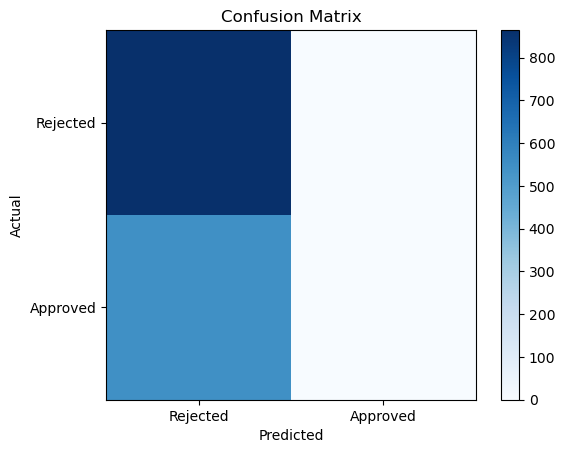

In [54]:
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

loan_train = pd.get_dummies(loan_train, columns=['education'], drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

model = LogisticRegression(solver='saga', max_iter=100, random_state=7)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## K nearest neighbor Modeling

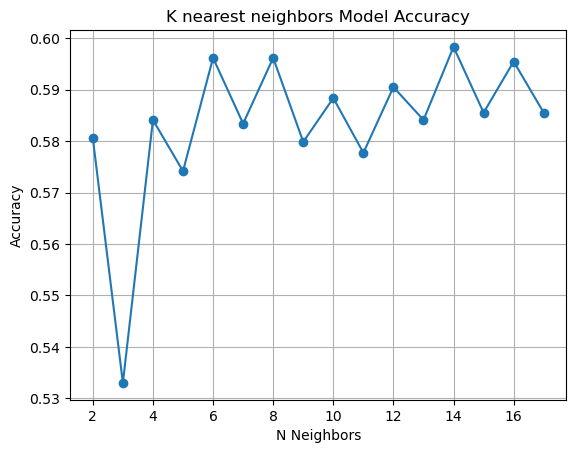

In [42]:
#utilizes prior split training and test data sets
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

#address categorical variables
loan_train = pd.get_dummies(loan_train, columns=['education'], drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

#Separate features and target vars. within training set
X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

n_neighbors_values = np.arange(2, 18)
accuracy_scores = []

#model is trained and utilized to make predictions
for n_neighbors in n_neighbors_values:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.xlabel("N Neighbors")
plt.ylabel("Accuracy")
plt.title("K nearest neighbors Model Accuracy")
plt.grid(True)
plt.show()

# Evaluation of the KNN Model

KNN best accuracy: 61.18%
Classification Report:
               precision    recall  f1-score   support

    Approved       0.62      0.77      0.69       865
    Rejected       0.41      0.25      0.31       544

    accuracy                           0.57      1409
   macro avg       0.52      0.51      0.50      1409
weighted avg       0.54      0.57      0.54      1409



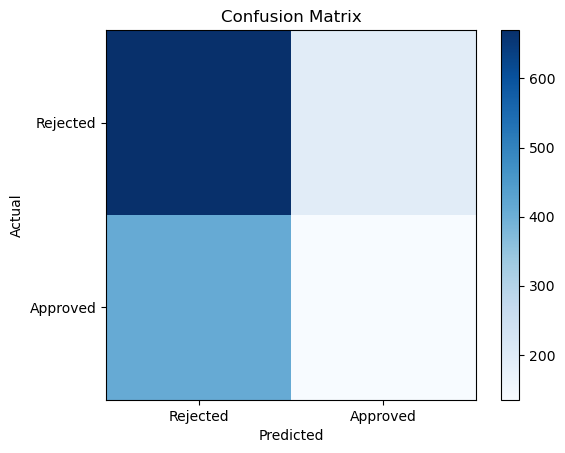

In [39]:
#accuracy is plotted
best_accuracy = max(accuracy_scores)
print("KNN best accuracy: {:.2f}%".format(best_accuracy * 100))

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Modeling

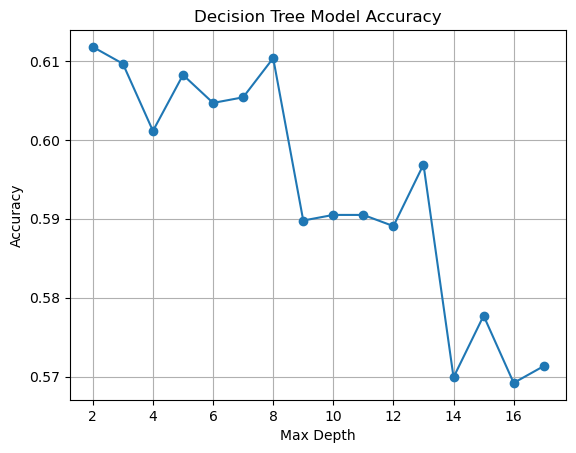

In [38]:
#utilizes prior split training and test data sets
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

#address categorical variables
loan_train = pd.get_dummies(loan_train, columns=['education'], drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

#Separate features and target vars. within training set
X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

max_depth_values = np.arange(2, 18)
accuracy_scores = []

#model is trained and utilized to make predictions
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

#accuracy is plotted
plt.plot(max_depth_values, accuracy_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Accuracy")
plt.grid(True)
plt.show()

# Decision Tree Model Evaluation

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.6132008516678495
Confusion Matrix:
 [[864   1]
 [544   0]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.61      1.00      0.76       865
    Rejected       0.00      0.00      0.00       544

    accuracy                           0.61      1409
   macro avg       0.31      0.50      0.38      1409
weighted avg       0.38      0.61      0.47      1409



## Random Forest Modeling

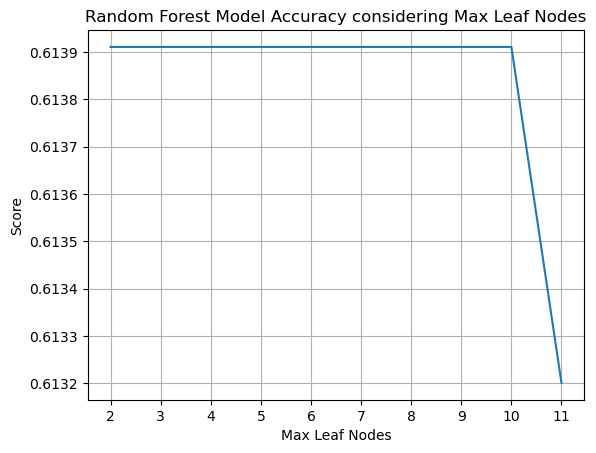

In [53]:
#utilizes prior split training and test data sets
loan_train, loan_test = train_test_split(loan, test_size=0.33, random_state=7)

#address categorical variables
loan_train = pd.get_dummies(loan_train, columns=['education'], drop_first=True)
loan_test = pd.get_dummies(loan_test, columns=['education'], drop_first=True)

#Separate features and target vars. within training set
X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

X_train = loan_train.drop(['loan_status'], axis=1)
y_train = loan_train['loan_status']

X_test = loan_test.drop(['loan_status'], axis=1)
y_test = loan_test['loan_status']

scoreListRF = []

#model is trained and utilized to make predictions
for i in range(2, 12):
    RFclassifier = RandomForestClassifier(n_estimators=200, max_depth=4, max_leaf_nodes=i, random_state=50)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

#accuracy is plotted
plt.plot(range(2, 12), scoreListRF)
plt.xticks(np.arange(2, 12))
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Score")
plt.title("Random Forest Model Accuracy considering Max Leaf Nodes")
plt.grid(True)
plt.show()



## Random Forest Evaluation

In [55]:
best_max_leaf_nodes = np.argmax(scoreListRF) + 2  
RFclassifier = RandomForestClassifier(n_estimators=100, max_depth=4, max_leaf_nodes=best_max_leaf_nodes, random_state=42)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

#accuracy is plotted
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Random Forest Accuracy: 61.39%
Confusion Matrix:
 [[865   0]
 [544   0]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.61      1.00      0.76       865
    Rejected       0.00      0.00      0.00       544

    accuracy                           0.61      1409
   macro avg       0.31      0.50      0.38      1409
weighted avg       0.38      0.61      0.47      1409



/Users/landonpadgett/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/landonpadgett/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/landonpadgett/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo